In [1]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import SimpleITK as sitk
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(font_scale=1.5)

pd.set_option('display.max_columns', 100)
plt.rcParams["font.size"] = 18
plt.rcParams["font.weight"] = 800

In [2]:
path='/home/kakeya/Desktop/higuchi/data/00157/SE2.nii.gz'
im=sitk.GetArrayFromImage(sitk.ReadImage(path))

In [3]:
im.shape

(271, 512, 512)

In [4]:
im=im.clip(-750,750)
im2=im+750

In [5]:
im2=(im2 *255/1500).astype(np.uint8)

In [6]:
im2=im2.astype(np.uint8)

In [7]:
import cv2

In [10]:
s=64
im3=np.zeros((271,s,s),dtype='uint8')
for i in range(im2.shape[0]):
    im3[i,:,:]=cv2.resize(im2[i,:,:],dsize=(s,s))


In [11]:
im3=im3.reshape(-1,s*s).T

In [12]:
im3.shape

(4096, 271)

In [26]:
im3[:,1]

(4096,)

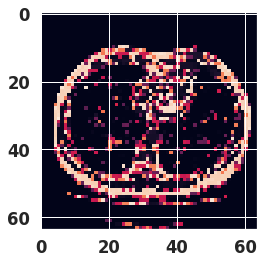

In [29]:
plt.imshow(im3[:,5].reshape(s,s))

In [35]:
autocorrelation.max()

255

In [69]:
im4=im3.reshape(64,64,-1)

In [75]:
pca=decomp.PCA(n_components =10)
pca.fit(im3)
hoge=pca.transform(im3)

In [99]:
hoge2=np.abs(hoge).reshape(s,s,-1)*255/np.abs(hoge).max()

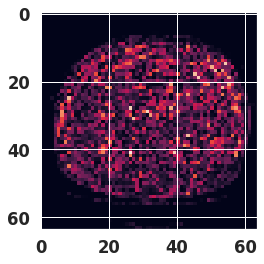

In [110]:
plt.imshow(hoge2[:,:,9])

In [207]:
for i in range(10):
    plt.imshow(hoge2[:,:,i],'gray')
    plt.savefig(f'PCA_{i}.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [128]:
from sklearn.linear_model import LinearRegression

In [138]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [167]:
x=hoge
sca1=np.zeros((im3.shape[1],3))
sca2=np.zeros((im3.shape[1],3))
sca3=np.zeros((im3.shape[1],3))

for i in range(im3.shape[1]):
    y=im3[:,i]
    reg=LinearRegression()
    reg.fit(x,y)
    sca1[i,:]=reg.coef_[:3]
    sca2[i,:]=reg.coef_[3:6]    
    sca3[i,:]=reg.coef_[6:9]    

In [197]:
sca_df1=pd.DataFrame(sca1)
sca_df1.columns=['dim1','dim2','dim3']
sca_df1['size']=1
sca_df1=sca_df1.reset_index()

sca_df2=pd.DataFrame(sca2)
sca_df2.columns=['dim4','dim5','dim6']
sca_df2['size']=1
sca_df2=sca_df2.reset_index()


sca_df3=pd.DataFrame(sca3)
sca_df3.columns=['dim7','dim8','dim9']
sca_df3['size']=1
sca_df3=sca_df3.reset_index()

In [206]:
fig = px.scatter_3d(sca_df3, x='dim7', y='dim8', z='dim9',size='size',size_max=10,color='index')
fig.update_layout(
    title="Dim7-Dim9",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [203]:
fig = px.scatter_3d(sca_df2, x='dim4', y='dim5', z='dim6',size='size',size_max=10,color='index')
fig.update_layout(
    title="Dim4-Dim6",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [202]:
import plotly.express as px

fig = px.scatter_3d(sca_df1, x='dim1', y='dim2', z='dim3',size='size',size_max=10,color='index')
fig.update_layout(
    title="Dim1-Dim3",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [169]:
plt.scatter(sca1)

TypeError: scatter() missing 1 required positional argument: 'y'

In [132]:
np.linalg.solve(hoge[:10,:], im3[:10,0])

LinAlgError: Singular matrix

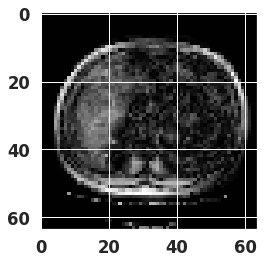

In [111]:
plt.imshow(hoge2[:,:,1],'gray')

In [57]:
auto=np.zeros(s*s)
for i in range(271):
    auto+=(im3[:,i]*im3[:,i].T)

In [61]:
auto/=271

In [13]:
autocorrelation=np.dot(im3,im3.T)

In [64]:
auto=auto.reshape(64,64)

In [65]:
eig_mat,eig_vec=np.linalg.eig(auto)

In [39]:
eig_vec[np.argsort(np.abs(eig_mat))[::-1]]

1.0

In [66]:
np.sort(eig_mat)[::-1][:500]

array([ 2.87708883e+03  +0.j        ,  1.89236616e+02  +0.j        ,
        8.54654940e+01  +0.j        ,  6.71604435e+01  +0.j        ,
        4.40151533e+01 +12.30802095j,  4.40151533e+01 -12.30802095j,
        3.49037927e+01 +22.43690805j,  3.49037927e+01 -22.43690805j,
        3.28663970e+01  +0.j        ,  2.62826388e+01  +0.j        ,
        2.55295904e+01+111.61983162j,  2.55295904e+01-111.61983162j,
        2.22797003e+01  +0.j        ,  1.72660834e+01 +25.71952166j,
        1.72660834e+01 -25.71952166j,  1.42006023e+01  +0.j        ,
        1.19131886e+01 +34.0008038j ,  1.19131886e+01 -34.0008038j ,
        1.17943423e+01 +15.78375021j,  1.17943423e+01 -15.78375021j,
        8.07086137e+00 +12.3065491j ,  8.07086137e+00 -12.3065491j ,
        3.87931506e+00 +24.39121155j,  3.87931506e+00 -24.39121155j,
        3.40871593e+00  +0.j        ,  3.54171528e-01  +0.j        ,
        0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ,
        0.00000000e+00  +0.j      

In [70]:
import sklearn.decomposition as decomp

In [27]:
def flatten_voxel2matrix(array,keep_dim=0):    
    flatten_array=np.zeros(array.shape[keep_dim],array[])
    for i in range(tmp_im.shape[0]):
    tmp_im[i,:,:].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [6]:
df=pd.read_csv('../output/csv/statistics.csv')

In [11]:
df.sort_values('shape_kid')

,index,count,count_CCR,count_cys,shape_kid,shape_CCR,shape_cys,lumi_mean,lumi_std,lumi_max,lumi_min,lumi_mean_SE2_CCR,lumi_std_SE2_CCR,lumi_max_SE2_CCR,lumi_min_SE2_CCR,lumi_mean_SE2_cys,lumi_std_SE2_cys,lumi_max_SE2_cys,lumi_min_SE2_cys,lumi_mean_SE3_kid,lumi_std_SE3_kid,lumi_max_SE3_kid,lumi_min_SE3_kid,lumi_mean_SE3_CCR,lumi_std_SE3_CCR,lumi_max_SE3_CCR,lumi_min_SE3_CCR,lumi_mean_SE3_cys,lumi_std_SE3_cys,lumi_max_SE3_cys,lumi_min_SE3_cys
113,159,222267,NaN,78706.0,41,0,41,27.597880,58.103993,266,-993,NaN,NaN,NaN,NaN,32.077008,52.413864,203.0,-116.0,32.055405,50.166603,232.57434,-985.213100,NaN,NaN,NaN,NaN,33.943863,42.456436,131.14844,-97.776920
93,124,257499,699.0,NaN,43,4,0,158.450363,93.074330,645,-155,131.470672,47.507189,272.0,-37.0,NaN,NaN,NaN,NaN,162.751830,77.228160,579.14575,-120.083010,142.319460,45.704456,230.89404,-28.162842,NaN,NaN,NaN,NaN
77,101,282613,61172.0,14593.0,46,32,19,112.206526,78.020155,330,-168,128.363402,56.206973,330.0,-112.0,12.072158,52.243713,245.0,-145.0,96.356720,64.835250,223.62231,-141.125060,81.880875,36.961610,203.06677,-103.127686,9.778305,44.562570,197.10913,-126.993900
101,138,315781,114739.0,225.0,48,25,4,130.388573,64.650795,343,-872,126.739470,62.404691,292.0,-80.0,112.444444,62.488596,231.0,-31.0,115.275780,46.739050,275.06335,-913.389830,96.601930,33.434280,189.39587,-94.613400,92.344650,45.810196,201.27588,-3.299561
111,154,245366,1762.0,1077.0,48,9,10,147.857389,92.288251,377,-136,141.860953,88.839488,323.0,-99.0,80.948932,52.985328,245.0,-2.0,151.928040,87.778720,306.23218,-121.812805,98.444220,56.279835,198.21277,-90.774600,121.074050,80.924515,272.42664,5.240723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,34,1039880,247135.0,NaN,96,56,0,90.690433,52.475395,312,-144,60.365213,34.076665,283.0,-113.0,NaN,NaN,NaN,NaN,107.678190,47.232525,224.67346,-112.456055,66.689870,25.905174,162.10522,-87.116516,NaN,NaN,NaN,NaN
100,136,1855627,1410687.0,175.0,97,92,6,66.740063,42.703355,587,-569,60.634713,41.436145,309.0,-92.0,42.514286,25.240072,126.0,-21.0,71.869110,38.407670,547.08020,-361.352970,61.335835,32.735596,273.50305,-165.188540,44.099450,26.981373,126.92175,-52.462097
105,146,609813,16116.0,261.0,102,23,24,84.894640,59.977608,279,-136,123.613986,32.680218,205.0,-73.0,97.517241,52.887619,168.0,-86.0,129.927120,62.359203,521.53810,-216.175300,107.065445,19.194344,188.40723,-34.049988,130.658310,41.927475,198.87097,-63.592590
15,16,538923,8671.0,NaN,127,23,0,99.611232,73.923160,1501,-222,51.657479,31.404120,195.0,-79.0,NaN,NaN,NaN,NaN,181.841770,89.161934,1330.33790,-177.404240,84.707790,42.764973,272.73547,-78.462036,NaN,NaN,NaN,NaN


In [10]:
df.head()

,index,count,count_CCR,count_cys,shape_kid,shape_CCR,shape_cys,lumi_mean,lumi_std,lumi_max,lumi_min,lumi_mean_SE2_CCR,lumi_std_SE2_CCR,lumi_max_SE2_CCR,lumi_min_SE2_CCR,lumi_mean_SE2_cys,lumi_std_SE2_cys,lumi_max_SE2_cys,lumi_min_SE2_cys,lumi_mean_SE3_kid,lumi_std_SE3_kid,lumi_max_SE3_kid,lumi_min_SE3_kid,lumi_mean_SE3_CCR,lumi_std_SE3_CCR,lumi_max_SE3_CCR,lumi_min_SE3_CCR,lumi_mean_SE3_cys,lumi_std_SE3_cys,lumi_max_SE3_cys,lumi_min_SE3_cys
0,1,369526,NaN,4787.0,72,0,36,166.598161,97.786464,381,-258,NaN,NaN,NaN,NaN,82.933779,80.775609,306.0,-61.0,134.41641,69.967010,243.51416,-124.340330,NaN,NaN,NaN,NaN,87.345610,68.152330,212.21985,-55.95453
1,2,336744,8872.0,4181.0,58,12,21,187.855472,105.852326,407,-431,193.337015,52.370062,357.0,-36.0,90.716814,114.471071,341.0,-321.0,145.61479,65.494130,262.03613,-165.240720,98.881030,39.603252,180.76941,-80.496826,74.190630,81.933624,216.40295,-246.58960
2,3,297822,1092.0,NaN,56,7,0,150.493379,94.248106,365,-145,207.461538,76.559330,322.0,-12.0,NaN,NaN,NaN,NaN,139.66228,71.149730,252.43835,-115.602420,139.330500,27.512150,192.01160,9.872314,NaN,NaN,NaN,NaN
3,4,308553,31025.0,3197.0,52,31,21,98.561761,64.842075,404,-127,97.176084,50.735019,300.0,-93.0,38.088208,74.523655,198.0,-112.0,132.55695,67.019875,239.79920,-123.067444,92.615230,41.627827,200.98999,-112.889100,75.311130,82.338030,208.70215,-95.21423
4,5,395548,1847.0,955.0,57,11,25,112.893234,81.394600,421,-144,171.413644,46.670695,268.0,-21.0,72.725654,78.990927,229.0,-136.0,122.77742,68.578224,238.73865,-127.562070,126.778915,34.245384,201.40198,-34.930786,78.132675,68.815160,205.39490,-107.88397
